As always, let's start by importing packages and generating dummy data. In this notebook, we are going to try to implement KNN for classification.

In [2]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [3]:
#we're going to generate normally distributed, well-separated data to test our model
X_11 = pd.Series(np.random.normal(1,2,5))
X_12 = pd.Series(np.random.normal(7,2,5))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_2 = pd.Series(np.random.normal(2,2,10))
Y = pd.Series(np.repeat([0,1],5))
data = pd.concat([X_1, X_2, Y], axis=1)
data.columns = ['X1', 'X2', 'Y']

In [4]:
data

,X1,X2,Y
0,0.477053,1.304112,0
1,1.306423,5.739800,0
2,3.664575,0.797492,0
3,-2.602126,2.452055,0
4,-1.182181,4.719134,0
5,8.570116,2.243422,1
6,6.321854,2.981976,1
7,1.618610,1.864182,1
8,9.241644,2.107962,1
9,7.788906,2.307428,1


Text(0.5, 1.0, 'First Look')

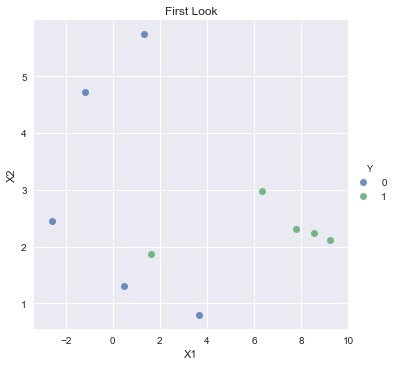

In [5]:
sns.lmplot('X1', 'X2', data=data, hue='Y', fit_reg=False)
plt.title('First Look')

Now that we have our data, we can start thinking about KNN. One of the choices you have to make for KNN is the distance measure you're going to use.

We are dealing with real-valued data so let's just use the Euclidean distance:

<center>
    $D(x_1, x_2) = \sqrt{\sum_{i=1}^n (x_1 - x_2)^2}$ 

Example using two training observations:

In [6]:
#randomly selecting two training observations
observation1 = data.iloc[np.random.randint(0,9), 0:2]
observation2 = data.iloc[np.random.randint(0,9), 0:2]
print('First observation:\nX1: {}, X2: {}'.format(observation1.X1, observation1.X2))
print('Second observation:\nX1: {}, X2: {}'.format(observation2.X1, observation1.X2))

First observation:
X1: 1.6186097959527883, X2: 1.8641823174450576
Second observation:
X1: 3.6645750744684396, X2: 1.8641823174450576


In [7]:
#defining a function to compute the distance between two data points
def eucl(obs1, obs2):
    """
    Input: two data points (with two attributes)
    Output: Euclidean distance between the two data points
    """
    squared_diff1 = (obs1[0] - obs2[0])**2
    squared_diff2 = (obs1[1] - obs2[1])**2
    
    sum_sq_diff = squared_diff1 + squared_diff2
    
    distance = np.sqrt(sum_sq_diff)
    
    return distance

In [8]:
eucl(observation1, observation2)

2.307336405226247

Therefore, the Euclidean distance between our two randomly selected observations is ~0.5.

Let's assume we encounter a brand new observation. How do we classify it?

In [9]:
#generating new observation
X_1 = pd.Series(np.random.normal(7,2,1))
X_2 = pd.Series(np.random.normal(2,2,1))
new_data = pd.concat([X_1, X_2], axis=1)
new_data.columns = ['X1', 'X2']

In [10]:
new_data

,X1,X2
0,6.871136,1.100847


Now, we're going to calculate the distances between this new observation and all previous observations:

In [11]:
#converting our data for computation
previous_obs = list(zip(list(data.X1), list(data.X2), list(data.Y)))
previous_obs

[(0.47705278515824534, 1.3041119568456874, 0),
 (1.3064228212614508, 5.739800291697937, 0),
 (3.6645750744684396, 0.7974924065568214, 0),
 (-2.6021262948528796, 2.4520546791225737, 0),
 (-1.1821805048991294, 4.719134122763282, 0),
 (8.570115940210993, 2.2434218949734026, 1),
 (6.321854176922117, 2.9819764862653932, 1),
 (1.6186097959527883, 1.8641823174450576, 1),
 (9.24164364799513, 2.107961921161105, 1),
 (7.788906150274311, 2.307428100912765, 1)]

In [12]:
results = []
for el in previous_obs:
    
    distance = eucl(el[0:2], new_data.iloc[0,0:2])
    results.append((distance, el[2]))

Assuming we've set k=2, we are going to search for the two most similar observations now (the two observations with the shortest distance result from our previous calculation).

In [13]:
results.sort(key=lambda x: x[0])
results

[(1.5159616057566097, 1),
 (1.9596833419210875, 1),
 (2.047439745704345, 1),
 (2.5755748873341417, 1),
 (3.2208784904111067, 0),
 (5.307703303695833, 1),
 (6.397313444090892, 0),
 (7.244716860608643, 0),
 (8.828811439674812, 0),
 (9.569141255082544, 0)]

The two closest values are of class 1, so we're going to classify our new observation as class 1 as well! And we're done!